In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)


In [2]:
df_train = pd.read_csv("train_LZdllcl.csv")
df_test = pd.read_csv("test_2umaH9m.csv")
#concating train and test data to perform data cleaning and preprocessing
df_concat = pd.concat([df_train,df_test],axis=0)

In [3]:
df_concat.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [4]:
df_train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Data is highly Immbalanced

# Univariate Analysis

In [5]:
np.round((df_concat.isnull().sum()/len(df_concat))*100,2)

employee_id              0.00
department               0.00
region                   0.00
education                4.40
gender                   0.00
recruitment_channel      0.00
no_of_trainings          0.00
age                      0.00
previous_year_rating     7.58
length_of_service        0.00
KPIs_met >80%            0.00
awards_won?              0.00
avg_training_score       0.00
is_promoted             30.00
dtype: float64

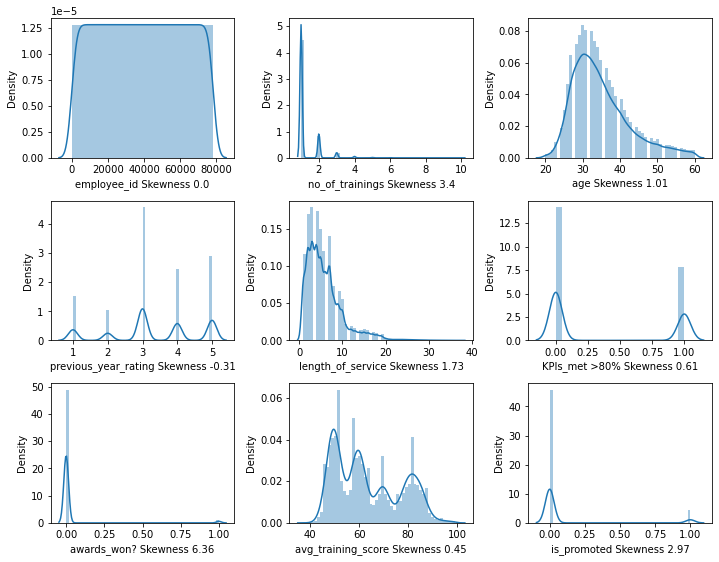

In [6]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,10))
c=1
for x in df_concat.select_dtypes(include=np.number):
    plt.subplot(4,3,c)
    sns.distplot(df_concat[x])
    plt.xlabel("{} Skewness {}".format(x,np.round(df_concat[x].skew(),2)))
    c+=1
plt.tight_layout()

checking for variables with normal distribution

In [7]:
#Ho: data is normally distributed
#ha: data is not normally distributed
for col in df_concat.select_dtypes(include=np.number):
    s,p  =stats.shapiro(df_concat[col])
    if p>0.05:
        #accepting the null hypothesis
        print(col)
        

previous_year_rating
is_promoted


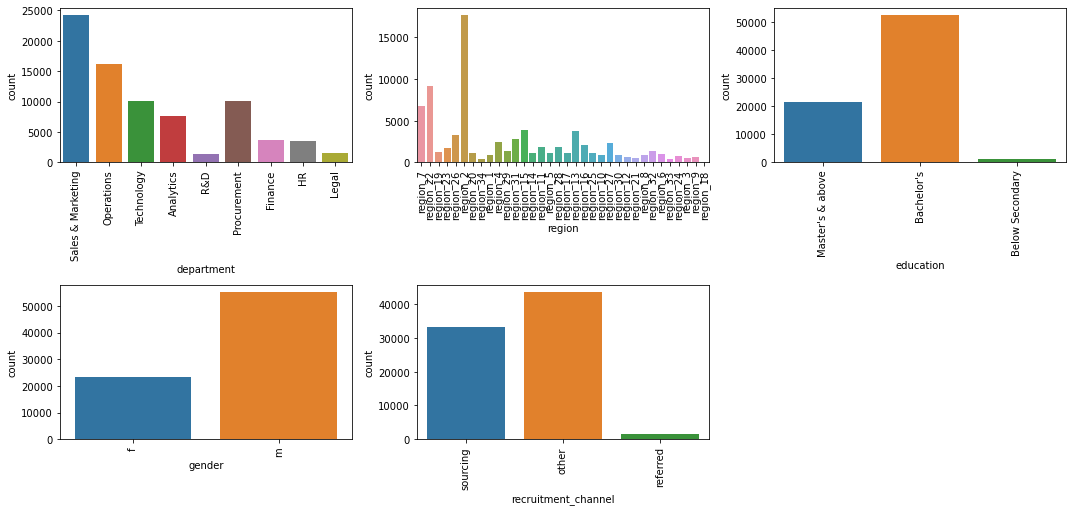

In [8]:
plt.figure(figsize=(15,14))
c=1
for x in df_concat.select_dtypes(include=object):
    plt.subplot(4,3,c)
    sns.countplot(df_concat[x])
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()

In [9]:
df_concat.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
print(len(df_concat["employee_id"].unique()),len(df_concat["employee_id"]))
#no employees have multiple enteries or multiple promotion

78298 78298


In [11]:
df_concat["department"].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [12]:
#sales&marketing>operation>procrument have highest number of employees 

In [13]:
df_concat["region"].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [14]:
#region_2(17642)>region_22>region_7 have most number of employees 

In [15]:
df_concat["education"].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [16]:
#bachelors>masters>below secondary

In [17]:
df_concat["recruitment_channel"].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [18]:
# recruitment through other are more than sourcing are more tham referred

In [19]:
for x in ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service',"avg_training_score"]:
    print("Number of unique values in {} = {} ".format(x,(len(df_concat[x].unique()))))

Number of unique values in no_of_trainings = 10 
Number of unique values in age = 41 
Number of unique values in previous_year_rating = 6 
Number of unique values in length_of_service = 35 
Number of unique values in avg_training_score = 61 


# Bivariate Analysis

<AxesSubplot:>

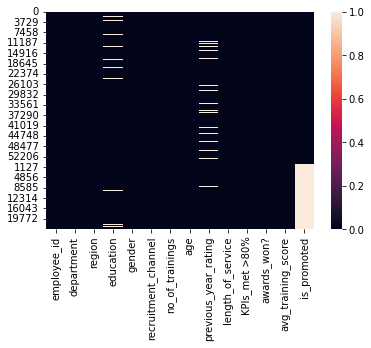

In [20]:
sns.heatmap(df_concat.isnull())

<AxesSubplot:>

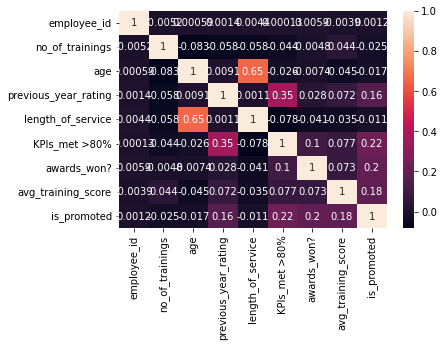

In [21]:
sns.heatmap(df_concat.corr(),annot=True)

In [22]:
for col in ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']:
    print("{} vs promotion".format(col))
    x=df_concat.groupby([col,"is_promoted"]).size().reset_index().drop_duplicates([col],keep="last")
    x.loc[x["is_promoted"]==0.0,0]=0
    y = df_concat[col].value_counts().reset_index()
    y.columns=[col,"count"]
    c=pd.merge(x,y,on=col,how="inner")
    c["perc promoted"] = (c[0]/c["count"])*100
    c.sort_values(by=["perc promoted"],inplace=True,ascending=False)
    print(c[[col,"perc promoted"]])
    print()
    print()
    print()

department vs promotion
          department  perc promoted
8         Technology       7.567248
5        Procurement       6.772987
0          Analytics       6.674488
4         Operations       6.349305
1            Finance       5.679625
7  Sales & Marketing       5.021735
6                R&D       4.794997
2                 HR       3.882387
3              Legal       3.571429



region vs promotion
       region  perc promoted
28   region_4       9.927361
8   region_17       9.420916
17  region_25       8.910035
15  region_23       8.101715
20  region_28       8.050183
14  region_22       8.006982
31   region_7       7.560440
22   region_3       7.505071
0    region_1       6.839623
23  region_30       6.344086
4   region_13       6.028834
32   region_8       5.735931
6   region_15       5.637379
11   region_2       5.605940
1   region_10       5.561614
19  region_27       5.529759
5   region_14       5.267630
7   region_16       4.963504
3   region_12       4.615385
18  region_26

In [23]:
# Technology department have most promotio foloowed by procrument,analytics and operations
# highest promotion in regions - 4>17>25>23>22
# Masters degree got most promotion
# female promoted more than male as male are more
# employees who join organisation through reference got more promotion
# less the training number more chances to get promotion
#age no insight
# promotion is directly dependent on previous year rating
#length of service no insight
# there ae more chances of promotion if kpi metrics is accheived
# there ae more chances of promotion if award is accheived
# more the training score more chances of promotion

# Data Cleaning

In [24]:
df_concat.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

Dealing null values of education with help of gender and age

In [25]:
df_concat.groupby(["gender","age","education"]).size().reset_index().drop_duplicates().sort_values(by=["gender","age",0],ascending=[True,True,False]).drop_duplicates(["gender","age"],keep="first")

gender  age         education     0
1        f   20   Below Secondary    20
3        f   21   Below Secondary    30
5        f   22   Below Secondary    51
7        f   23   Below Secondary    78
8        f   24        Bachelor's   201
10       f   25        Bachelor's   415
12       f   26        Bachelor's   742
15       f   27        Bachelor's  1078
18       f   28        Bachelor's  1269
20       f   29        Bachelor's  1374
22       f   30        Bachelor's  1381
24       f   31        Bachelor's  1228
26       f   32        Bachelor's  1120
28       f   33        Bachelor's   901
30       f   34        Bachelor's   753
32       f   35        Bachelor's   643
34       f   36        Bachelor's   543
36       f   37        Bachelor's   458
39       f   38  Master's & above   412
41       f   39  Master's & above   363
43       f   40  Master's & above   317
45       f   41  Master's & above   297
47       f   42  Master's & above   236
49       f   43  Master's & above   207
51       f   44  Master's & above   167
52       f   45        Bachelor's   133
55       f   46  Master's & above   131
57       f   47  Master's & above   113
58       f   48        Bachelor's   103
61       f   49  Master's & above    91
63       f   50  Master's & above   117
65       f   51  Master's & above    97
66       f   52        Bachelor's    89
68       f   53        Bachelor's    95
70       f   54        Bachelor's    63
72       f   55        Bachelor's    82
75       f   56  Master's & above    75
76       f   57        Bachelor's    61
78       f   58        Bachelor's    70
81       f   59  Master's & above    73
82       f   60        Bachelor's    65
84       m   20        Bachelor's    66
88       m   21   Below Secondary    40
90       m   22   Below Secondary    86
91       m   23        Bachelor's   211
93       m   24        Bachelor's   470
95       m   25        Bachelor's  1017
97       m   26        Bachelor's  1807
100      m   27        Bachelor's  2620
103      m   28        Bachelor's  2843
106      m   29        Bachelor's  3047
109      m   30        Bachelor's  3206
112      m   31        Bachelor's  2755
115      m   32        Bachelor's  2496
117      m   33        Bachelor's  2079
119      m   34        Bachelor's  1873
121      m   35        Bachelor's  1548
123      m   36        Bachelor's  1428
125      m   37        Bachelor's  1171
127      m   38        Bachelor's  1062
129      m   39        Bachelor's   886
131      m   40        Bachelor's   910
133      m   41        Bachelor's   737
136      m   42  Master's & above   588
137      m   43        Bachelor's   513
140      m   44  Master's & above   431
141      m   45        Bachelor's   400
143      m   46        Bachelor's   364
146      m   47  Master's & above   295
147      m   48        Bachelor's   288
149      m   49        Bachelor's   248
152      m   50  Master's & above   254
153      m   51        Bachelor's   201
155      m   52        Bachelor's   170
158      m   53  Master's & above   169
160      m   54  Master's & above   165
161      m   55        Bachelor's   138
164      m   56  Master's & above   124
166      m   57  Master's & above   124
168      m   58  Master's & above   114
170      m   59  Master's & above    86
172      m   60  Master's & above    90

In [26]:
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==20) & (df_concat["education"].isnull()),"education"]="Below Secondary"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==21) & (df_concat["education"].isnull()),"education"]="Below Secondary"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==22) & (df_concat["education"].isnull()),"education"]="Below Secondary"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==23) & (df_concat["education"].isnull()),"education"]="Below Secondary"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==24) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==25) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==26) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==27) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==28) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==29) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==30) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==31) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==32) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==33) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==34) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==35) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==36) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==37) & (df_concat["education"].isnull()),"education"]="Bachelor's"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==38) & (df_concat["education"].isnull()),"education"]="Master's & above"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==39) & (df_concat["education"].isnull()),"education"]="Master's & above"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==40) & (df_concat["education"].isnull()),"education"]="Master's & above"
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==41) & (df_concat["education"].isnull()),"education"]="Master's & above"
for x in np.arange(42,61):
    df_concat.loc[(df_concat["gender"]=="f") & (df_concat["age"]==x) & (df_concat["education"].isnull()),"education"]="Master's & above"

In [27]:
for x in [20,21,22]:
    df_concat.loc[(df_concat["gender"]=="m") & (df_concat["age"]==x) & (df_concat["education"].isnull()),"education"]="Below Secondary"
for x in np.arange(23,42):
    df_concat.loc[(df_concat["gender"]=="m") & (df_concat["age"]==x) & (df_concat["education"].isnull()),"education"]="Bachelor's"
for x in np.arange(42,61):
    df_concat.loc[(df_concat["gender"]=="m") & (df_concat["age"]==x) & (df_concat["education"].isnull()),"education"]="Master's & above"

Dealing missing values of previous year rating

In [28]:
df_concat.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [29]:
df_concat.loc[df_concat["previous_year_rating"].isnull()]

employee_id         department     region         education gender  \
10           29934         Technology  region_23        Bachelor's      m   
23           71177        Procurement   region_5        Bachelor's      m   
29           74759  Sales & Marketing   region_4        Bachelor's      m   
56           45709  Sales & Marketing  region_31        Bachelor's      f   
58           26599  Sales & Marketing  region_16        Bachelor's      m   
62            9150          Analytics  region_22        Bachelor's      f   
66           77981            Finance  region_22        Bachelor's      m   
67           16502  Sales & Marketing  region_22        Bachelor's      m   
84           44575              Legal   region_7        Bachelor's      m   
89            9589  Sales & Marketing  region_31        Bachelor's      f   
90           62658  Sales & Marketing   region_2   Below Secondary      f   
96           64109         Technology  region_26        Bachelor's      f   
111          51444                 HR  region_13        Bachelor's      f   
123          41746         Operations  region_22        Bachelor's      f   
125           5461          Analytics   region_8        Bachelor's      m   
127          66874  Sales & Marketing  region_27        Bachelor's      f   
135           5102         Operations   region_7        Bachelor's      m   
141          50593            Finance  region_23        Bachelor's      m   
160          45157                 HR   region_4        Bachelor's      m   
178          28314            Finance  region_26        Bachelor's      m   
214          17833          Analytics   region_4        Bachelor's      m   
220          43676        Procurement   region_2        Bachelor's      m   
232          22300                 HR  region_20        Bachelor's      m   
242          42636  Sales & Marketing  region_26        Bachelor's      m   
245          24414                R&D   region_2        Bachelor's      m   
255          15737            Finance  region_22        Bachelor's      m   
272          35873              Legal   region_2   Below Secondary      m   
313          11892        Procurement  region_12        Bachelor's      f   
316          22511         Technology  region_24        Bachelor's      m   
334          74579         Operations   region_2   Below Secondary      m   
371           6587        Procurement  region_13        Bachelor's      m   
374          56233          Analytics  region_22        Bachelor's      f   
381           9192         Operations  region_21        Bachelor's      m   
386          36460         Operations  region_13        Bachelor's      m   
389          64798          Analytics  region_22        Bachelor's      m   
427          22462  Sales & Marketing  region_32        Bachelor's      f   
430          10002                 HR   region_2   Below Secondary      m   
436           5640          Analytics   region_2        Bachelor's      m   
471          53981         Operations   region_5        Bachelor's      m   
475          36691  Sales & Marketing  region_14        Bachelor's      m   
492          57033         Operations   region_2        Bachelor's      m   
508           6788  Sales & Marketing   region_2  Master's & above      f   
517          30155          Analytics  region_32        Bachelor's      m   
518          59337          Analytics  region_22  Master's & above      m   
522            573                R&D  region_22        Bachelor's      f   
531          54550         Technology   region_8        Bachelor's      f   
532          31552  Sales & Marketing  region_21        Bachelor's      m   
542          63667        Procurement  region_26        Bachelor's      m   
553          18621  Sales & Marketing   region_2        Bachelor's      f   
566           5272         Operations   region_2   Below Secondary      f   
567          49389              Legal  region_27   Below Secondary      m   
577

In [30]:
# previous year rating is null where length of service =1
df_concat.loc[df_concat["previous_year_rating"].isnull(),"previous_year_rating"]=-1

# Data Preprocessing and Feature Engineering

In [31]:
#MAKING a new column experience based on previous year rating
def experience(r):
    if r==-1:
        return "fresher"
    else:
        return "experienced"
df_concat["experience"] = df_concat["previous_year_rating"].apply(experience)

In [32]:
#Ho: both variables are independet
from scipy.stats import chi2_contingency
table = pd.crosstab(df_concat["experience"],df_concat["is_promoted"].map({0.0:"not promoted",1.0:"promoted"}))
chi2_contingency(table)
#pvalue>0.05 accept the null hypothesis


(0.46393585445413144,
 0.4957902681251435,
 1,
 array([[46367.24127865,  4316.75872135],
        [ 3772.75872135,   351.24127865]]))

In [33]:
df_concat.drop("experience",axis=1,inplace=True)

In [34]:
#droping employee id

df_concat.drop("employee_id",axis=1,inplace=True)

In [35]:
#binning regions
df_concat.loc[df_concat["region"].isin(np.array(["region_4","region_17","region_25","region_23","region_28","region_22","region_7","region_3"])),"region"]=3
df_concat.loc[df_concat["region"].isin(np.array(["region_1","region_30","region_13","region_8","region_15","region_2","region_10","region_27","region_14","region_16","region_12","region_26","region_20","region_19"])),"region"]=2
df_concat.loc[df_concat["region"].isin(np.array(["region_31",       
"region_11",      
"region_6",       
"region_5",     
"region_29",      
"region_21",       
"region_32",     
"region_33",       
"region_24",       
"region_18",       
"region_34",      
"region_9"])),"region"]=1


In [36]:
#Reffered have more chances of getting promotion
df_concat.loc[df_concat["recruitment_channel"]=="referred","recruitment_channel"]=2
df_concat.loc[df_concat["recruitment_channel"]=="sourcing","recruitment_channel"]=1
df_concat.loc[df_concat["recruitment_channel"]=="other","recruitment_channel"]=1

In [38]:
# In data we can see chance of getting promotion is more when no of training is less so mapping it
def mapp(v):
    if v==7 or v==8 or v==9 or v==10:
        return 0
    else:
        return 11-v
df_concat["no_of_trainings"] = df_concat["no_of_trainings"].apply(mapp)

In [39]:
# Age and Length of service is highly correlated so dropping length of srvice as it have less correlation then age with target varibale
df_concat.drop("length_of_service",axis=1,inplace=True)

In [40]:
df_concat.head(10)

department region         education gender recruitment_channel  \
0  Sales & Marketing      3  Master's & above      f                   1   
1         Operations      3        Bachelor's      m                   1   
2  Sales & Marketing      2        Bachelor's      m                   1   
3  Sales & Marketing      3        Bachelor's      m                   1   
4         Technology      2        Bachelor's      m                   1   
5          Analytics      2        Bachelor's      m                   1   
6         Operations      2        Bachelor's      f                   1   
7         Operations      1  Master's & above      m                   1   
8          Analytics      2        Bachelor's      m                   1   
9  Sales & Marketing      2  Master's & above      m                   1   

   no_of_trainings  age  previous_year_rating  KPIs_met >80%  awards_won?  \
0               10   35                   5.0              1            0   
1               10   30                   5.0              0            0   
2               10   34                   3.0              0            0   
3                9   39                   1.0              0            0   
4               10   45                   3.0              0            0   
5                9   31                   3.0              0            0   
6               10   31                   3.0              0            0   
7               10   33                   3.0              0            0   
8               10   28                   4.0              0            0   
9               10   32                   5.0              1            0   

   avg_training_score  is_promoted  
0                  49          0.0  
1                  60          0.0  
2                  50          0.0  
3                  50          0.0  
4                  73          0.0  
5                  85          0.0  
6                  59          0.0  
7                  63          0.0  
8                  83          0.0  
9                  54          0.0

In [41]:
df_concat["education"].value_counts()

Bachelor's          55123
Master's & above    21791
Below Secondary      1384
Name: education, dtype: int64

In [46]:
df_concat["education"] = df_concat["education"].map({"Master's & above":1,"Bachelor's":2,"Below Secondary":0})
df_concat['gender'] = df_concat["gender"].map({"f":1,"m":0})

In [47]:
df_concat=pd.get_dummies(df_concat,drop_first=True)

In [48]:
#splitting data into train test

In [49]:
train = df_concat.iloc[0:54808]

In [50]:
test = df_concat.iloc[54808:]

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train[["age","avg_training_score"]])
train[["age","avg_training_score"]] = sc.transform(train[["age","avg_training_score"]])
test[["age","avg_training_score"]] = sc.transform(test[["age","avg_training_score"]])

# Model Building

SVM

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train.drop("is_promoted",axis=1),train["is_promoted"])
pred_Y = svc.predict(test.drop("is_promoted",axis=1))

In [53]:
sum(pred_Y==1)

206

In [54]:
sub_svc = df_test['employee_id']
sub_svc=pd.concat([sub_svc,pd.DataFrame(pred_Y)],axis=1)
sub_svc.columns = ["employee_id","is_promoted"]
sub_svc["is_promoted"] = sub_svc["is_promoted"].astype(int)
sub_svc.to_csv("3sepsvc.csv",index=False)

f1 score 0.18

Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train.drop("is_promoted",axis=1),train["is_promoted"])
pred_Y = rf.predict(test.drop("is_promoted",axis=1))

In [56]:
sum(pred_Y==1)

1185

In [57]:
sub_rf = df_test['employee_id']
sub_rf=pd.concat([sub_rf,pd.DataFrame(pred_Y)],axis=1)


In [58]:
sub_rf.columns = ["employee_id","is_promoted"]
sub_rf["is_promoted"] = sub_rf["is_promoted"].astype(int)
sub_rf.to_csv("2sepRF.csv",index=False)

0.45 f1 score

XGBOOST

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train.drop("is_promoted",axis=1),train["is_promoted"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
pred_y_xgb = xgb.predict(test.drop("is_promoted",axis=1))

In [61]:
sum(pred_y_xgb==1)

744

In [63]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_xgb)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred["is_promoted"] = pred["is_promoted"].astype(int)
pred.to_csv("3sepxgb.csv",index=False)

0.4787 f1 score

Light GBM

In [64]:
import lightgbm
lgb = lightgbm.LGBMClassifier()
lgb.fit(train.drop("is_promoted",axis=1),train["is_promoted"])

LGBMClassifier()

In [65]:
pred_y_lgb = lgb.predict(test.drop("is_promoted",axis=1))

In [66]:
sum(pred_y_lgb==1)

696

In [68]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_lgb)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred["is_promoted"] = pred["is_promoted"].astype(int)
pred.to_csv("3seplgb.csv",index=False)

0.4751 f1 score

CAT BOOST

In [69]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(train.drop("is_promoted",axis=1),train["is_promoted"])

Learning rate set to 0.05694
0:	learn: 0.6199570	total: 159ms	remaining: 2m 38s
1:	learn: 0.5624596	total: 167ms	remaining: 1m 23s
2:	learn: 0.5137040	total: 175ms	remaining: 58s
3:	learn: 0.4743722	total: 184ms	remaining: 45.8s
4:	learn: 0.4355186	total: 194ms	remaining: 38.7s
5:	learn: 0.4090602	total: 203ms	remaining: 33.7s
6:	learn: 0.3763447	total: 213ms	remaining: 30.2s
7:	learn: 0.3558353	total: 223ms	remaining: 27.6s
8:	learn: 0.3383706	total: 232ms	remaining: 25.5s
9:	learn: 0.3247327	total: 242ms	remaining: 23.9s
10:	learn: 0.3112237	total: 251ms	remaining: 22.6s
11:	learn: 0.2997195	total: 261ms	remaining: 21.5s
12:	learn: 0.2908644	total: 270ms	remaining: 20.5s
13:	learn: 0.2824909	total: 279ms	remaining: 19.6s
14:	learn: 0.2664726	total: 291ms	remaining: 19.1s
15:	learn: 0.2538428	total: 303ms	remaining: 18.6s
16:	learn: 0.2476071	total: 315ms	remaining: 18.2s
17:	learn: 0.2431442	total: 325ms	remaining: 17.7s
18:	learn: 0.2387811	total: 335ms	remaining: 17.3s
19:	learn: 0

161:	learn: 0.1602966	total: 1.65s	remaining: 8.55s
162:	learn: 0.1601806	total: 1.67s	remaining: 8.56s
163:	learn: 0.1601285	total: 1.68s	remaining: 8.56s
164:	learn: 0.1601079	total: 1.7s	remaining: 8.58s
165:	learn: 0.1600739	total: 1.71s	remaining: 8.6s
166:	learn: 0.1600082	total: 1.72s	remaining: 8.6s
167:	learn: 0.1599509	total: 1.74s	remaining: 8.6s
168:	learn: 0.1598576	total: 1.75s	remaining: 8.61s
169:	learn: 0.1598013	total: 1.76s	remaining: 8.61s
170:	learn: 0.1597084	total: 1.78s	remaining: 8.62s
171:	learn: 0.1596315	total: 1.79s	remaining: 8.63s
172:	learn: 0.1595800	total: 1.8s	remaining: 8.63s
173:	learn: 0.1595117	total: 1.82s	remaining: 8.63s
174:	learn: 0.1594329	total: 1.83s	remaining: 8.63s
175:	learn: 0.1593883	total: 1.85s	remaining: 8.65s
176:	learn: 0.1593541	total: 1.87s	remaining: 8.71s
177:	learn: 0.1592513	total: 1.89s	remaining: 8.74s
178:	learn: 0.1591948	total: 1.91s	remaining: 8.75s
179:	learn: 0.1591495	total: 1.93s	remaining: 8.78s
180:	learn: 0.159

333:	learn: 0.1523170	total: 3.77s	remaining: 7.52s
334:	learn: 0.1522962	total: 3.78s	remaining: 7.51s
335:	learn: 0.1522765	total: 3.79s	remaining: 7.5s
336:	learn: 0.1522435	total: 3.8s	remaining: 7.49s
337:	learn: 0.1522252	total: 3.81s	remaining: 7.47s
338:	learn: 0.1522078	total: 3.82s	remaining: 7.45s
339:	learn: 0.1521891	total: 3.83s	remaining: 7.44s
340:	learn: 0.1521769	total: 3.84s	remaining: 7.42s
341:	learn: 0.1521595	total: 3.85s	remaining: 7.41s
342:	learn: 0.1521259	total: 3.86s	remaining: 7.39s
343:	learn: 0.1521041	total: 3.87s	remaining: 7.38s
344:	learn: 0.1520580	total: 3.88s	remaining: 7.36s
345:	learn: 0.1520403	total: 3.88s	remaining: 7.34s
346:	learn: 0.1520135	total: 3.9s	remaining: 7.33s
347:	learn: 0.1519965	total: 3.9s	remaining: 7.32s
348:	learn: 0.1519647	total: 3.91s	remaining: 7.3s
349:	learn: 0.1519401	total: 3.92s	remaining: 7.29s
350:	learn: 0.1519198	total: 3.93s	remaining: 7.27s
351:	learn: 0.1518876	total: 3.94s	remaining: 7.26s
352:	learn: 0.151

496:	learn: 0.1480793	total: 5.41s	remaining: 5.48s
497:	learn: 0.1480516	total: 5.43s	remaining: 5.47s
498:	learn: 0.1480288	total: 5.44s	remaining: 5.47s
499:	learn: 0.1480067	total: 5.46s	remaining: 5.46s
500:	learn: 0.1479843	total: 5.48s	remaining: 5.46s
501:	learn: 0.1479586	total: 5.49s	remaining: 5.45s
502:	learn: 0.1479318	total: 5.51s	remaining: 5.45s
503:	learn: 0.1478950	total: 5.53s	remaining: 5.44s
504:	learn: 0.1478747	total: 5.54s	remaining: 5.43s
505:	learn: 0.1478663	total: 5.55s	remaining: 5.42s
506:	learn: 0.1478278	total: 5.57s	remaining: 5.41s
507:	learn: 0.1478137	total: 5.58s	remaining: 5.41s
508:	learn: 0.1477910	total: 5.6s	remaining: 5.4s
509:	learn: 0.1477729	total: 5.61s	remaining: 5.39s
510:	learn: 0.1477612	total: 5.63s	remaining: 5.39s
511:	learn: 0.1477381	total: 5.64s	remaining: 5.38s
512:	learn: 0.1477099	total: 5.66s	remaining: 5.38s
513:	learn: 0.1476841	total: 5.67s	remaining: 5.37s
514:	learn: 0.1476704	total: 5.69s	remaining: 5.36s
515:	learn: 0.

669:	learn: 0.1443852	total: 7.52s	remaining: 3.7s
670:	learn: 0.1443603	total: 7.53s	remaining: 3.69s
671:	learn: 0.1443496	total: 7.55s	remaining: 3.68s
672:	learn: 0.1443240	total: 7.56s	remaining: 3.67s
673:	learn: 0.1443148	total: 7.57s	remaining: 3.66s
674:	learn: 0.1442813	total: 7.59s	remaining: 3.65s
675:	learn: 0.1442661	total: 7.6s	remaining: 3.64s
676:	learn: 0.1442405	total: 7.62s	remaining: 3.63s
677:	learn: 0.1442266	total: 7.63s	remaining: 3.62s
678:	learn: 0.1442079	total: 7.64s	remaining: 3.61s
679:	learn: 0.1441535	total: 7.65s	remaining: 3.6s
680:	learn: 0.1441176	total: 7.67s	remaining: 3.59s
681:	learn: 0.1441068	total: 7.68s	remaining: 3.58s
682:	learn: 0.1440665	total: 7.69s	remaining: 3.57s
683:	learn: 0.1440445	total: 7.71s	remaining: 3.56s
684:	learn: 0.1440264	total: 7.72s	remaining: 3.55s
685:	learn: 0.1440064	total: 7.73s	remaining: 3.54s
686:	learn: 0.1439707	total: 7.75s	remaining: 3.53s
687:	learn: 0.1439524	total: 7.76s	remaining: 3.52s
688:	learn: 0.1

842:	learn: 0.1413927	total: 9.8s	remaining: 1.82s
843:	learn: 0.1413702	total: 9.81s	remaining: 1.81s
844:	learn: 0.1413522	total: 9.83s	remaining: 1.8s
845:	learn: 0.1413468	total: 9.85s	remaining: 1.79s
846:	learn: 0.1413292	total: 9.86s	remaining: 1.78s
847:	learn: 0.1413020	total: 9.87s	remaining: 1.77s
848:	learn: 0.1412744	total: 9.88s	remaining: 1.76s
849:	learn: 0.1412717	total: 9.9s	remaining: 1.75s
850:	learn: 0.1412397	total: 9.91s	remaining: 1.74s
851:	learn: 0.1412211	total: 9.92s	remaining: 1.72s
852:	learn: 0.1411990	total: 9.94s	remaining: 1.71s
853:	learn: 0.1411787	total: 9.95s	remaining: 1.7s
854:	learn: 0.1411631	total: 9.96s	remaining: 1.69s
855:	learn: 0.1411585	total: 9.98s	remaining: 1.68s
856:	learn: 0.1411365	total: 9.99s	remaining: 1.67s
857:	learn: 0.1411215	total: 10s	remaining: 1.66s
858:	learn: 0.1411101	total: 10s	remaining: 1.64s
859:	learn: 0.1410921	total: 10s	remaining: 1.63s
860:	learn: 0.1410796	total: 10s	remaining: 1.62s
861:	learn: 0.1410589	to

In [70]:
pred_y_cat = cbc.predict(test.drop("is_promoted",axis=1))

In [71]:
sum(pred_y_cat==1)

745

In [72]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_cat)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred["is_promoted"] = pred["is_promoted"].astype(int)
pred.to_csv("2sepcat.csv",index=False)

0.50 f1 score


# Stacking

In [73]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
l = [("xgb",XGBClassifier()),("lgb",LGBMClassifier()),("CatB",CatBoostClassifier()),("rf",RandomForestClassifier())]
model = StackingClassifier(estimators=l,final_estimator=LogisticRegression(),cv=5,n_jobs=-1,verbose=2,passthrough=True)

In [74]:
model.fit(train.drop("is_promoted",axis=1),train["is_promoted"])

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                      

In [75]:
pred_y_stacking = model.predict(test.drop("is_promoted",axis=1))

In [76]:
sum(pred_y_stacking==1)

764

In [77]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_stacking)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred["is_promoted"] = pred["is_promoted"].astype(int)
pred.to_csv("stacking3Sep.csv",index=False)

f1 score 0.5

# Neural Network

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score

In [79]:
from sklearn.model_selection import train_test_split
train_labels = train["is_promoted"]
train_labels = np.asarray(train_labels).astype('int').reshape((-1,1))
x_train,x_val,y_train,y_val = train_test_split(train.drop("is_promoted",axis=1),train_labels,test_size=0.2,random_state=10)

In [80]:
model = Sequential()
model.add(Dense(64,activation="relu",input_shape=(x_train.shape[1],)))

In [81]:

model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"],)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1371/1371 [==============================] - 3s 2ms/step - loss: 0.2345 - accuracy: 0.9210 - val_loss: 0.2183 - val_accuracy: 0.9244
Epoch 2/20
1371/1371 [==============================] - 1s 948us/step - loss: 0.1996 - accuracy: 0.9295 - val_loss: 0.1940 - val_accuracy: 0.9323
Epoch 3/20
1371/1371 [==============================] - 1s 1ms/step - loss: 0.1815 - accuracy: 0.9370 - val_loss: 0.1811 - val_accuracy: 0.9369
Epoch 4/20
1371/1371 [==============================] - 1s 964us/step - loss: 0.1739 - accuracy: 0.9397 - val_loss: 0.1720 - val_accuracy: 0.9405
Epoch 5/20
1371/1371 [==============================] - 1s 1ms/step - loss: 0.1712 - accuracy: 0.9403 - val_loss: 0.1708 - val_accuracy: 0.9412
Epoch 6/20
1371/1371 [==============================] - 1s 1ms/step - loss: 0.1690 - accuracy: 0.9410 - val_loss: 0.1688 - val_accuracy: 0.9413
Epoch 7/20
1371/1371 [==============================] - 2s 1ms/step - loss: 0.1680 - accuracy: 0.9414 - val_loss: 0.1703 - val_accur

In [84]:
pred = model.predict_classes(test.drop("is_promoted",axis=1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [85]:
pred_nn = []
for x in pred:
    pred_nn.append(x[0])

In [86]:
pred_nn = np.array(pred_nn)

In [87]:
sum(pred_nn==1)

678

In [88]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_nn)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred["is_promoted"] = pred["is_promoted"].astype(int)
pred.to_csv("NN.csv",index=False)

f1 score 0.48

# Hyper Parameter Tunning